###1. Naive simulation with matrix multiplication
We have a statevector of length $2^n$ for an n-qubit system.
Here we will have to expand each of the gates with the identity matrix given before applying it to a state vector representing multi-qubit systems.

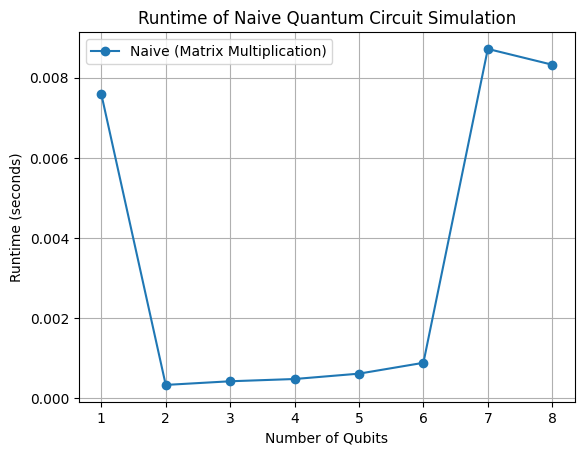

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define single-qubit gates
X = np.array([[0, 1], [1, 0]])
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])
I = np.eye(2)

# Define CNOT for 2 qubits
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

def expandSingleQubit(gate, qubit_index, n_qubits):
    full_gate = 1
    for i in range(n_qubits):
        if i == qubit_index:
            full_gate = np.kron(full_gate, gate)
        else:
            full_gate = np.kron(full_gate, I)
    return full_gate

def naive_simulation(n_qubits, gate_seq):
    # Initial state vector |0...0>
    state = np.zeros((2**n_qubits,))
    state[0] = 1

    # Apply gates using matrix multiplication
    for gate, qubit_idx in gate_seq:
        if len(qubit_idx) == 1:
            expanded_gate = expandSingleQubit(gate, qubit_idx[0], n_qubits)
            state = np.dot(expanded_gate, state)
        #CNOT is expanded for more than two qubits
        elif len(qubit_idx) == 2:
            expanded_gate = CNOT if n_qubits == 2 else np.kron(CNOT, np.eye(2**(n_qubits - 2)))
            state = np.dot(expanded_gate, state)

    return state

# Measure and plot runtimes
qubits = range(1, 9)
naive_runtimes = []

for n in qubits:
    # Define a sample gate sequence for testing
    gate_seq = [(X, [0]), (H, [1])] + ([(CNOT, [0, 1])] if n >= 2 else [])

    # Measure time
    start_time = time.time()
    naive_simulation(n, gate_seq)
    naive_runtimes.append(time.time() - start_time)

# Plot runtime
plt.plot(qubits, naive_runtimes, label="Naive (Matrix Multiplication)", marker="o")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime of Naive Quantum Circuit Simulation")
plt.legend()
plt.grid(True)
plt.show()


Computational complexity exponentially increases with more qubits applied, so we can only test up to 8 qubits for 2^8 = 256 elements.

### 2) Advanced simulation using tensor multiplication
We have an n-dimensional tensor of shape (2, 2 ... 2).

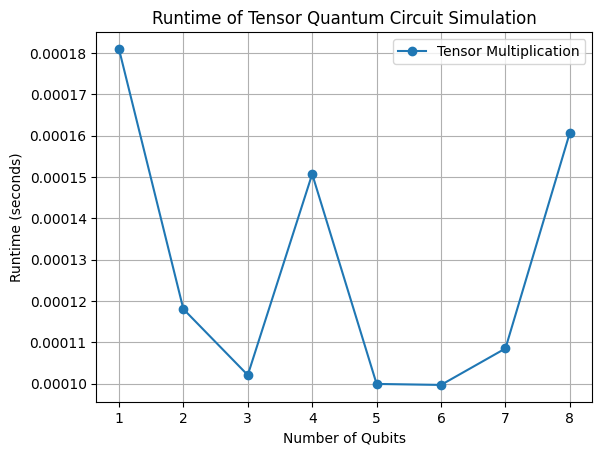

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define single-qubit gates
X = np.array([[0, 1], [1, 0]])
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])
I = np.eye(2)

# Define CNOT for 2 qubits
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

def apply_gate(state_tensor, gate, qubit_idx):
    # Apply a single-qubit or two-qubit gate to the state tensor
    if len(qubit_idx) == 1:
        state_tensor = np.tensordot(gate, state_tensor, axes=(1, qubit_idx[0]))
    elif len(qubit_idx) == 2:
        state_tensor = np.tensordot(gate.reshape(2, 2, 2, 2), state_tensor,
                                    axes=([2, 3], qubit_idx))
    return state_tensor

def tensor_simulation(n_qubits, gate_sequence):
    # Initial state tensor |0...0>
    state_tensor = np.zeros((2,) * n_qubits)
    state_tensor[(0,) * n_qubits] = 1

    # Apply gates using tensor multiplication
    for gate, qubit_idx in gate_sequence:
        state_tensor = apply_gate(state_tensor, gate, qubit_idx)

    return state_tensor

# Measure and plot runtimes
qubits = range(1, 9)
tensor_runtimes = []

for n in qubits:
    # Define a sample gate sequence for testing
    gate_sequence = [(X, [0]), (H, [min(1,n-1)])] + ([(CNOT, [0, min(1,n-1)])] if n >= 2 else [])

    # Measure time
    start_time = time.time()
    tensor_simulation(n, gate_sequence)
    tensor_runtimes.append(time.time() - start_time)

# Plot runtime
plt.plot(qubits, tensor_runtimes, label="Tensor Multiplication", marker="o")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime of Tensor Quantum Circuit Simulation")
plt.legend()
plt.grid(True)
plt.show()


Similarly, computational complexity exponentially increases with more qubits applied, so we can only test up to 8 qubits for 2^8 = 256 elements. However, the runtime is reduced by a factor of 10, making this method more efficient.  We do not have to expand the qubits to the full system size like in matrix multiplication.